In [232]:
import pandas as pd
import regex as re
import nltk
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('C:\\Users\\LENOVO\Downloads\\malignant_train.csv')

In [25]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [55]:
df[df['malignant'] ==  1]['comment_text'].values[0]

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [60]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(df[df['malignant'] ==  1]['comment_text'].values))

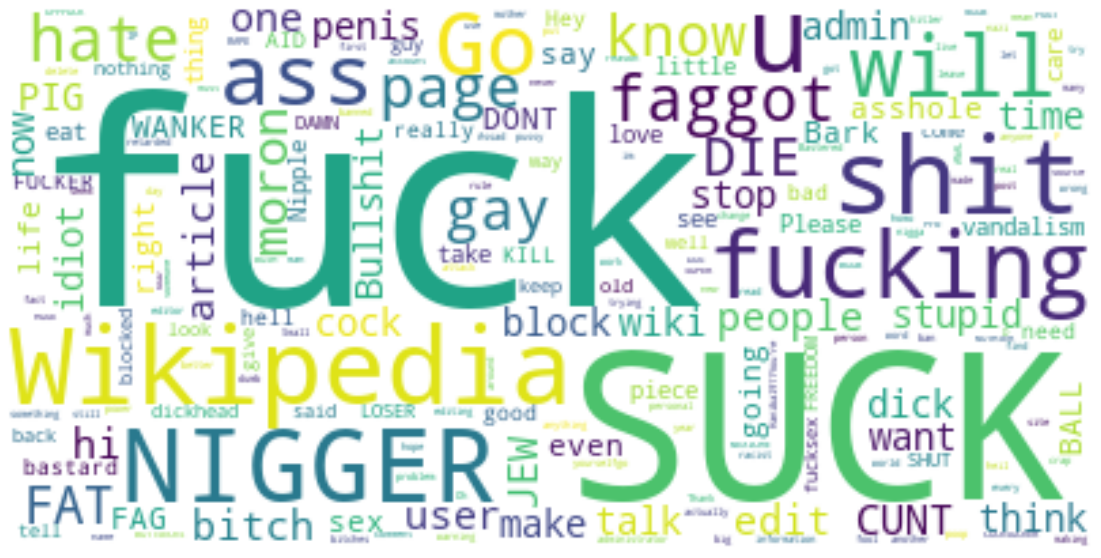

In [64]:
plt.figure( figsize=(20,10) )
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Malignancy will be classified on the basis of parts of speech

In [66]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [67]:
nlp =  spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [68]:
sntnc = nlp('COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK')

In [69]:
for word in sntnc:
        print(word.text, word.pos_, word.dep_)

COCKSUCKER PROPN ROOT
BEFORE ADP mark
YOU PRON nsubj
PISS VERB advcl
AROUND ADP prep
ON ADP prep
MY NOUN compound
WORK NOUN dobj


In [83]:
from collections import Counter
from tqdm import tqdm

In [84]:
def parse_comments_in_a_column(review_column):
    parsed_comment_list = []
    for comment in tqdm(review_column):
        parsed_comment_list.append(nlp(comment))
    return parsed_comment_list

In [85]:
parsed_comment_list = parse_comments_in_a_column(df['comment_text'])

100%|██████████████████████████████████████████████████████████████████████████| 159571/159571 [50:11<00:00, 52.99it/s]


In [103]:
parsed_comment_list[100012]

Has it failed WP:RS? I thought that is what we were meant to be discussing. And when did majority rule replace consensus? That discussion has only just started. I find your aggressive actions in this episode disturbing. It would be nice if you would let things run their course without hyperbole, doublespeak, contradictions, and threats. In fact, it would be nice if you didn't keep typing things but never addressing any of my questions, so please don't reply here unless absolutely necessary. Thanks.

In [116]:
from spacy.lang.en import English

In [114]:
main_list = []
for doc in tqdm(parsed_comment_list):
    noun, verb, adj,adv = [], [], [], []
    for token in doc:
        if token.pos_ in ["NOUN","ADV","ADJ","VERB"]:
            if token._.polarity < 0:
                if token.pos_ == "NOUN":
                    noun.append(token.text)
                elif token.pos_ == "ADV":
                    adv.append(token.text)
                elif token.pos_ == "VERB":
                    verb.append(token.text)
                elif token.pos_ == "ADJ":
                    adj.append(token.text)
    main_list.append([noun, verb, adj,adv])

100%|███████████████████████████████████████████████████████████████████████| 159571/159571 [13:43:21<00:00,  3.23it/s]


In [117]:
from spacy.lang.en.stop_words import STOP_WORDS

In [119]:
len(STOP_WORDS)

326

In [121]:
len(parsed_comment_list)

159571

In [122]:
my_doc = nlp("I bought a laptop today.")
token_list = []
for token in my_doc:
    token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

filtered_sentence =[] 

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 
print(token_list)
print(filtered_sentence)

['I', 'bought', 'a', 'laptop', 'today', '.']
['bought', 'laptop', 'today', '.']


In [129]:
def get_filtered_sentence(parsed_sentence):
    token_list = []
    for token in parsed_sentence:
        token_list.append(token.text)

    filtered_sentence =[] 

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
            
    return " ".join(filtered_sentence)

In [130]:
get_filtered_sentence(nlp("I bought a laptop today."))

'bought laptop today .'

In [132]:
df["parsed_sentence"] = parsed_comment_list

In [134]:
df["filtered_sentence"] = df["parsed_sentence"].apply(get_filtered_sentence)

In [135]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,parsed_sentence,filtered_sentence
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"(Explanation, \n, Why, the, edits, made, under...",Explanation \n edits username Hardcore Metalli...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"(D'aww, !, He, matches, this, background, colo...",D'aww ! matches background colour seemingly st...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"(Hey, man, ,, I, 'm, really, not, trying, to, ...","Hey man , trying edit war . guy constantly rem..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"("", \n, More, \n, I, ca, n't, make, any, real,...",""" \n \n real suggestions improvement - wondere..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"(You, ,, sir, ,, are, my, hero, ., Any, chance...",", sir , hero . chance remember page ?"


In [ ]:
"""
def stop_parts_of_speech(revised_pos):
    
    main_list = []
    for doc in tqdm(parsed_comment_list):
        noun, verb, adj,adv = [], [], [], []
        for token in doc:
            if token.pos_ in ["NOUN","ADV","ADJ","VERB"]:
                if token._.polarity < 0:
                    if token.pos_ == "NOUN":
                        noun.append(token.text)
                    elif token.pos_ == "ADV":
                        adv.append(token.text)
                    elif token.pos_ == "VERB":
                        verb.append(token.text)
                    elif token.pos_ == "ADJ":
                        adj.append(token.text)
        main_list.append([noun, verb, adj,adv])
"""

In [336]:
doc = nlp("I bought a laptop.")

In [337]:
for token in doc:
    print(token.lemma_)

I
buy
a
laptop
.


In [217]:
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [338]:
filtered_pos = []
for i in doc:
    #print(i)
    
    if i.pos_ in ['NOUN', 'ADV', 'ADJ', 'VERB']:
        filtered_pos.append(i.text)
        #print(i)

In [339]:
' '.join(filtered_pos)

'bought laptop'

In [230]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [251]:
def filter_neagtive_words(doc):
    filtered_pos = []
    for i in doc:
        if i.pos_ in ['NOUN', 'ADV', 'ADJ', 'VERB']:
            filtered_pos.append(i.lemma_)
    return ' '.join(filtered_pos)

In [277]:
def make_lower(sentence):
    return " ".join([str(i).lower() for i in sentence.split(" ")])

In [252]:
df["filtered_negative_sentence"] = df["parsed_sentence"].apply(new_pos_list)

In [285]:
#df["filtered_negative_sentence"] = df["filtered_negative_sentence"].apply(stemming)
df["filtered_negative_sentence_"] = df["filtered_negative_sentence"].apply(cleanHtml)
df["filtered_negative_sentence_"] = df["filtered_negative_sentence_"].apply(cleanPunc)
df["filtered_negative_sentence_"] = df["filtered_negative_sentence_"].apply(keepAlpha)
df["filtered_negative_sentence_"] = df["filtered_negative_sentence_"].apply(make_lower)

In [287]:
df["filtered_negative_sentence_"].values[:65]

array(['', '', '', '', '', '', '', '', 'merely messy', 'subject',
       'boilerplate other usually other other', '', 'destroying',
       'merely single late absence', '', 'down', '', '', '', 'mean',
       'unnecessary bad', '', 'common', 'single',
       'wrong subject other less', 'extinct', 'subject', 'harshly',
       'base', '', 'uncivil', '', '', 'hard spent unfortunately failed',
       '', 'absurd unfair absurd', 'other', '', '',
       'subject subject subject subject', 'redundant', 'other',
       'brutally deadly fucking', 'fuck filthy', 'sorry sorry bad',
       'false', '', 'other lazy', '', 'allegedly subject leftist merely',
       'other less other other', 'fucked fuck fucked fucked', 'common',
       'slow usually lazy', '', 'stupid shit', '',
       'sorry fail previous deficient',
       'fuck long mediocre failure bad single dead empty fucking sucker fuck little',
       'dead', '', '', '', 'wrong forced', ''], dtype=object)

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['filtered_negative_sentence_']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [244]:
Y = df['malignant'].values

In [289]:
print(X.shape)

(159571, 838)


In [210]:
Y.shape

(159571, 6)

In [320]:
def get_models(Y):
    #Train test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)
    
    #Initialize models
    LR = LogisticRegression(random_state=0)
    SVM = svm.LinearSVC()
    RF = RandomForestClassifier(random_state=0)
    clf = DecisionTreeClassifier(random_state=0)
    grd = GradientBoostingClassifier(random_state=0)
    xgb = XGBClassifier(random_state=0)
    
    #Create a blank dictionary to store model and corresponding metric score
    model_dic = dict()
    
    #RUn each model for Y and get a metric score
    for model_name, model in tqdm(zip(["Logistic Regression",
                                      "Support Vector Machine", 
                                      "Random Forest",
                                      "Decision Tree",
                                      "Gradient Boost",
                                      "XG Boost"],[LR,SVM,RF,clf,grd,xgb])):
        #train a model
        model.fit(X_train, Y_train)
        #get prediction for test data
        Y_predict = model.predict(X_test)
        #get metric score
        metric_score = roc_auc_score(Y_test, Y_predict)
        
        #Put these values in the dictionary
        #model_dic[model_name] = (model, metric_score)
        model_dic[model_name] = {"model":model,"metric_score": metric_score}
        
    #now we have to find best metric score in this dictionary and return the corresponding model
    best_model = [key for key in model_dic.keys() if model_dic.get(key).get('metric_score') == max(d['metric_score'] for d in model_dic.values())][0]
    
    return model_dic.get(best_model)

In [324]:
final_dict = dict()
for col in tqdm(['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']):
    Y = df[col].values
    best_model = get_models(Y)
    final_dict[col] = best_model

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]
0it [00:00, ?it/s]C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

1it [00:00,  1.18it/s]
2it [00:01,  1.56it/s]
3it [00:58, 26.52s/it]
4it [01:00, 16.71s/it]
5it [01:07, 13.29s/it]C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass opti

[20:51:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



6it [01:09, 11.66s/it]
 17%|██████████████                                                                      | 1/6 [01:09<05:49, 69.98s/it]
0it [00:00, ?it/s]
1it [00:00,  1.85it/s]
2it [00:00,  2.27it/s]
3it [00:38, 17.62s/it]
4it [00:39, 10.96s/it]
5it [00:48, 10.02s/it]C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



6it [00:49,  8.32s/it]
 33%|████████████████████████████                                                        | 2/6 [02:00<03:53, 58.27s/it]
0it [00:00, ?it/s]
1it [00:00,  1.48it/s]
2it [00:01,  1.80it/s]
3it [00:47, 21.41s/it]
4it [00:48, 13.45s/it]
5it [00:58, 12.11s/it]C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:53:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



6it [01:00, 10.08s/it]
 50%|██████████████████████████████████████████                                          | 3/6 [03:00<02:57, 59.32s/it]
0it [00:00, ?it/s]
1it [00:00,  2.71it/s]
2it [00:00,  2.74it/s]
3it [00:35, 16.15s/it]
4it [00:36, 10.06s/it]
5it [00:43,  9.11s/it]C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



6it [00:45,  7.61s/it]
 67%|████████████████████████████████████████████████████████                            | 4/6 [03:46<01:47, 53.97s/it]
0it [00:00, ?it/s]C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

1it [00:00,  1.41it/s]
2it [00:01,  1.79it/s]
3it [00:47, 21.49s/it]
4it [00:48, 13.50s/it]
5it [00:56, 11.54s/it]C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the

[20:54:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



6it [00:59,  9.92s/it]
 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [04:46<00:56, 56.01s/it]
0it [00:00, ?it/s]
1it [00:00,  2.23it/s]
2it [00:00,  2.35it/s]
3it [00:39, 18.07s/it]
4it [00:40, 11.34s/it]
5it [00:48,  9.97s/it]C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



6it [00:50,  8.42s/it]
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [05:36<00:00, 56.12s/it]


In [325]:
final_dict

{'malignant': {'model': RandomForestClassifier(random_state=0),
  'metric_score': 0.683827017811099},
 'highly_malignant': {'model': LogisticRegression(random_state=0),
  'metric_score': 0.521949490267632},
 'rude': {'model': RandomForestClassifier(random_state=0),
  'metric_score': 0.7218243766747252},
 'threat': {'model': DecisionTreeClassifier(random_state=0),
  'metric_score': 0.5225072299761095},
 'abuse': {'model': RandomForestClassifier(random_state=0),
  'metric_score': 0.6704763154308733},
 'loathe': {'model': DecisionTreeClassifier(random_state=0),
  'metric_score': 0.5127313125415592}}

In [322]:
best_model

{'model': RandomForestClassifier(random_state=0),
 'metric_score': 0.683827017811099}

In [191]:
#LR.fit(X_train,Y_train)
#SVM.fit(X_train,Y_train)
#RF.fit(X_train,Y_train)
#clf.fit(X_train,Y_train)
#grd.fit(X_train,Y_train)
#xgb.fit(X_train,Y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(random_state=0)

In [192]:
#LR_Result = LR.predict(X_test)
#SVM_Result = SVM.predict(X_test)
#RF_Result = RF.predict(X_test)
#clf_Result = clf.predict(X_test)
#grd_Result = grd.predict(X_test)
#xgb_Result = xgb.predict(X_test)

In [198]:
from sklearn.metrics import f1_score, roc_auc_score

In [201]:
def get_metrics(Y_predict):
    print("F1 Score: ",f1_score(Y_test, Y_predict))
    print("roc auc Score: ",roc_auc_score(Y_test, Y_predict))

In [203]:
get_metrics(clf_Result)

F1 Score:  0.6582193316887195
roc auc Score:  0.797651211720988


In [204]:
get_metrics(LR_Result)

F1 Score:  0.6655742182165779
roc auc Score:  0.7573195906598695


In [205]:
def classify(X_train, X_test, Y_train, Y_test, model):
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    get_metrics(pred)
    #get_metrics(model.predict(X_test)) #Substitute for above two lines

In [291]:
for model_name, model in zip(["Logistic Regression",
                              "Support Vector Machine", 
                              "Random Forest",
                              "Decision Tree",
                              "Gradient Boost",
                              "XG Boost"],[LR,SVM,RF,clf,grd,xgb]):
    
    print(model_name)
    classify(X_train, X_test, Y_train, Y_test, model)
    print("\n")

Logistic Regression


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score:  0.5061654135338345
roc auc Score:  0.6760834016986768


Support Vector Machine
F1 Score:  0.5139135583185317
roc auc Score:  0.6811139514556853


Random Forest
F1 Score:  0.516355140186916
roc auc Score:  0.683827017811099


Decision Tree
F1 Score:  0.49425947187141217
roc auc Score:  0.6770058695165254


Gradient Boost
F1 Score:  0.46200031600568814
roc auc Score:  0.6537057493952809


XG Boost


C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score:  0.5069277108433735
roc auc Score:  0.6761992040934703


